# <h2><b> Đồ án thực hành </b></h2>
<h1 style='color:red;text-align:center;font-size:35px'><b>Chủ đề: Dự đoán giá rượu vang</b></h1>

# <h3>Các thành viên trong nhóm</h3>
<li> Phan Xuân Hoài - 20120481 </li>
<li> Lê Kinh Luân - 1612355 </li>
<li> Nguyễn Minh Nghĩa - 20120534</li>
<li> Phạm Quốc Hưng - 19120522</li>

# <h1 style='color:blue;text-align:center;font-size:30px'><b>Phần B</b></h1>

## Import những thư viện cần thiết

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
sns.set_theme()

# YOUR CODE HERE (OPTION)
# Nếu cần các thư viện khác thì bạn có thể import ở đây
import os
import re
import statistics
import seaborn as sns
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgray'})

In [41]:
import sys
sys.executable

'D:\\anconda\\python.exe'

In [42]:
cd champagne/champagne

c:\Users\PC\Desktop\Into Data Science\Seminar\-NMKHDL_20_21\champagne\champagne


### Đọc file 'champagnes_info.csv' vào dataframe df

In [43]:
df = pd.read_csv('./dataset/champagnes_info.csv')
df.head(20)

,Ma_sp,Ten_sp,Gia,Xuat_xu,Nong_do,Dung_tich,Giong_nho,Mau_sac,Loai_ruou,Thuong_hieu,Vung_lam_vang
0,WVN-9400,Rượu Champagne Armand De Brignac Blanc,9.400.000,Pháp\r\n,12.5 %\r\n,750 ML\r\n,Chardonnay,Màu trắng,Rượu Champagne,Armand De Brignac,NaN
1,VNHM-1350,Rượu Champagne Arnaud Tabourin,1.350.000,Pháp\r\n,12 %\r\n,750 ML\r\n,Chardonnay,,Rượu Champagne,Arnaud Tabourin,NaN
2,VNHM1-1750,Rượu Champagne Autreau Brut Premier Cru,1.750.000,Pháp\r\n,12 %\r\n,750 ML\r\n,Chardonnay,NaN,Rượu Vang Trắng,NaN,Champagne
3,VNHM1-1850,Rượu Champagne Autreau Reserve Brut Grand Cru,1.850.000,Pháp\r\n,12 %\r\n,750 ML\r\n,"Chardonnay,Pinot Nero",,Rượu Champagne,Autreau,NaN
4,VNTK1-2760,Rượu Champagne Ayala Blanc De Blancs,2.760.000,Pháp\r\n,12 %\r\n,750 ML\r\n,Chardonnay,Vàng nhạt,Rượu Champagne,: Ayala,NaN
5,VNTK-2294,Rượu Champagne Ayala Brut Majeur,2.294.000,Pháp\r\n,12 %\r\n,750 ML\r\n,"Chardonnay,Pinot Noir,Pinot Meunier",Vàng rơm,Rượu Champagne,: Ayala,NaN
6,VNTK-2734,Rượu Champagne Ayala Brut Nature,2.734.000,Pháp\r\n,12 %\r\n,750 ML\r\n,"Chardonnay,Pinot Noir,Pinot Meunier",Vàng rơm,Rượu Champagne,: Ayala,NaN
7,VNPE-1250,Rượu Champagne Bernard Lonclas Blanc,1.250.000,Pháp\r\n,12 %\r\n,750 ML\r\n,"Pinot Noir,Pinot Meunieur,Chardonnay",Vàng rơm,Rượu Champagne,NaN,NaN
8,VNWH1-4200,Rượu Champagne Billecart Salmon Blanc De Blancs,2.709.000,Pháp\r\n,12.5 %\r\n,750 ML\r\n,Chardnonnay,NaN,Champagne,Champagne Billecart,NaN
9,VNWH1-2750,Rượu Champagne Billecart Salmon Brut Réserve,1.895.000,Pháp\r\n,12.5 %\r\n,750 ML\r\n,"Chardonnay,Pinot Noir,Pinot Meunier",Màu vàng rơm,Champagne,Champagne Billecart,NaN


# Khám phá dữ liệu

### Xem số dòng cột của dữ liệu 

In [44]:
num_rows = df.shape[0]
num_cols = df.shape[1]
shape = (num_rows, num_cols)
shape

(5598, 11)

### Kiểu dữ liệu của các cột 

In [45]:
df.dtypes

Ma_sp            object
Ten_sp           object
Gia              object
Xuat_xu          object
Nong_do          object
Dung_tich        object
Giong_nho        object
Mau_sac          object
Loai_ruou        object
Thuong_hieu      object
Vung_lam_vang    object
dtype: object

### Ý nghĩa của các cột

Đọc file "champagnes_schema.csv" vào DataFrame `col_meaning_df`

In [46]:
temp = pd.read_csv("./dataset/champagnes_schema.csv")
temp
data = {
    "name": temp["name"],
    "mean": temp["mean"]
}
pd.set_option('max_colwidth', 400)


col_meaning_df = pd.DataFrame(data = data)
col_meaning_df = col_meaning_df.set_index(['name'])

In [47]:
col_meaning_df

,mean
name,
Ma_sp,Ma san pham
Ten_sp,Ten ruou
Gia,Gia tien san pham
Xuat_xu,Xuat xu cua ruou(quoc gia)
Nong_do,Nong do cua ruou
Dung_tich,Dung tich chai ruou
Giong_nho,Giong nho lam ruou
Mau_sac,Mau sac cua ruou
Loai_ruou,San pham thuoc loai ruou nao


# Tiền xử lý

Loại bỏ các ký tự '\n' (hoặc '\r\n' trong Windows) và các ký tự dư thừa trong các cột 'Xuat_xu', 'Nong_do', 'Dung_tich', 'Giong_nho','Thuong_hieu' để có thể chuyển đổi các cột về dạng số dễ dàng hơn.

In [48]:
def is_nan(x):
    return (x != x)

In [49]:
cate_cols = df.select_dtypes(include = ['object']).columns.tolist()
df[cate_cols] = df[cate_cols].apply(lambda x : x.replace('\\r?\\n', '', regex = True))
df['Nong_do'] = df['Nong_do'].str.replace('%', '')
df['Dung_tich'] = df['Dung_tich'].str.replace('ML', '')
cols = ['Giong_nho', 'Mau_sac', 'Thuong_hieu', 'Vung_lam_vang']
df[cols] = df[cols].apply(lambda x : x.str.replace(':', ''))
df = df.apply(lambda x : x.str.strip())


Chuyển kiểu dữ liệu của các cột 'Dung_tich', 'Nong_do','Gia' về dạng số

In [50]:
df['Nong_do'] = pd.to_numeric(df['Nong_do'], errors='coerce')
df['Dung_tich'] = pd.to_numeric(df['Dung_tich'], downcast='float', errors='coerce')
df['Gia'] = df['Gia'].replace('[.]', '', regex=True).astype(float)

In [51]:
df.dtypes

Ma_sp             object
Ten_sp            object
Gia              float64
Xuat_xu           object
Nong_do          float64
Dung_tich        float32
Giong_nho         object
Mau_sac           object
Loai_ruou         object
Thuong_hieu       object
Vung_lam_vang     object
dtype: object

Lọc đi các chai rượu có giá thấp bất thường 

In [13]:
df.loc[df['Gia'] < 1000, 'Gia'].value_counts()

1.0      408
770.0      1
86.0       1
Name: Gia, dtype: int64

Có tới hơn 400 chai có giá thấp hơn 1000, một mức giá vô lý. Ta sẽ tiến hành lọc đi các chai rượu này.

In [14]:
df = df[~(df['Gia'] < 1000)].reset_index(drop = True)

## Quay lại bước khám phá dữ liệu 

Với các cột có kiểu dữ liệu số, ta cần tính:
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu 
- Giá trị min
- Giá trị lower quartile (phân vị 25)
- Giá trị median (phân vị 50)
- Giá trị upper quartile (phân vị 75)
- Giá trị max

Sau đó lưu kết quả vào DataFrame `num_col_info_df`, trong đó: 
- Tên của các cột là tên của các cột số trong `df`
- Tên của các dòng là: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"  

Để dễ nhìn, tất cả các giá trị bạn đều làm tròn với 1 chữ số thập phân bằng phương thức `.round(1)`.

In [15]:
items = ["Gia","Nong_do","Dung_tich"]
percentMissingList = []
for item in items:
   percentMissingList.append(round(df[item].apply(is_nan).tolist().count(1)/shape[0] * 100,1))

percentMissingList

columns = ["Gia","Nong_do","Dung_tich"]
row_labels = ["missing_ratio","min","lower_quartile","median","upper_quartile","max"]
temp = df[["Gia","Nong_do","Dung_tich"]]
info_df = temp.quantile(q=[0.25,0.5, 0.75], axis=0, numeric_only=True, interpolation='midpoint')
max = round(temp.max(axis = 0),1)
min = round(temp.min(axis = 0),1)

data = [percentMissingList,min,info_df.loc[0.25].tolist(),info_df.loc[0.5].tolist(),info_df.loc[0.75].tolist(),max]
num_col_info_df = pd.DataFrame(data = data, index = row_labels, columns = columns)
num_col_info_df

,Gia,Nong_do,Dung_tich
missing_ratio,0.0,0.1,0.0
min,105000.0,0.0,187.0
lower_quartile,459000.0,13.0,750.0
median,777000.0,13.5,750.0
upper_quartile,1518000.0,14.0,750.0
max,39000000.0,45.0,6000.0


### Tiền xử lý

Xử lý chuỗi của cột "Màu sắc" thành chuỗi viết thường (Vd: ở cột màu săc có "Vàng Rơm", "Vàng rơm"... thì chuyển thành "vàng rơm"), xóa khoảng trắng đầu và cuối, đồng bộ ký tự màu sắc ("màu vàng rơm", "vàng rơm" --> "vàng rơm")

In [16]:
df['Mau_sac'] = df['Mau_sac'].str.lower()
df['Mau_sac'] = df['Mau_sac'].str.strip()

df = df.apply(lambda x: x.replace({'màu':'', ': ':'','vàng':'vàng','đỏ':'đỏ'}, regex=True))
df['Mau_sac'] = df['Mau_sac'].str.strip()


In [17]:
df.head(20)

,Ma_sp,Ten_sp,Gia,Xuat_xu,Nong_do,Dung_tich,Giong_nho,Mau_sac,Loai_ruou,Thuong_hieu,Vung_lam_vang
0,WVN-9400,Rượu Champagne Armand De Brignac Blanc,9400000.0,Pháp,12.5,750.0,Chardonnay,trắng,Rượu Champagne,Armand De Brignac,NaN
1,VNHM-1350,Rượu Champagne Arnaud Tabourin,1350000.0,Pháp,12.0,750.0,Chardonnay,,Rượu Champagne,Arnaud Tabourin,NaN
2,VNHM1-1750,Rượu Champagne Autreau Brut Premier Cru,1750000.0,Pháp,12.0,750.0,Chardonnay,NaN,Rượu Vang Trắng,NaN,Champagne
3,VNHM1-1850,Rượu Champagne Autreau Reserve Brut Grand Cru,1850000.0,Pháp,12.0,750.0,"Chardonnay,Pinot Nero",,Rượu Champagne,Autreau,NaN
4,VNTK1-2760,Rượu Champagne Ayala Blanc De Blancs,2760000.0,Pháp,12.0,750.0,Chardonnay,vàng nhạt,Rượu Champagne,Ayala,NaN
5,VNTK-2294,Rượu Champagne Ayala Brut Majeur,2294000.0,Pháp,12.0,750.0,"Chardonnay,Pinot Noir,Pinot Meunier",vàng rơm,Rượu Champagne,Ayala,NaN
6,VNTK-2734,Rượu Champagne Ayala Brut Nature,2734000.0,Pháp,12.0,750.0,"Chardonnay,Pinot Noir,Pinot Meunier",vàng rơm,Rượu Champagne,Ayala,NaN
7,VNPE-1250,Rượu Champagne Bernard Lonclas Blanc,1250000.0,Pháp,12.0,750.0,"Pinot Noir,Pinot Meunieur,Chardonnay",vàng rơm,Rượu Champagne,NaN,NaN
8,VNWH1-4200,Rượu Champagne Billecart Salmon Blanc De Blancs,2709000.0,Pháp,12.5,750.0,Chardnonnay,NaN,Champagne,Champagne Billecart,NaN
9,VNWH1-2750,Rượu Champagne Billecart Salmon Brut Réserve,1895000.0,Pháp,12.5,750.0,"Chardonnay,Pinot Noir,Pinot Meunier",vàng rơm,Champagne,Champagne Billecart,NaN


## Quay lại bước khám phá dữ liệu 

Với các cột "Xuat_xu","Giong_nho","Mau_sac","Thuong_hieu" ta cần tính:
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu 
- Số lượng các giá trị (các giá trị ở đây là các giá trị khác nhau và ta không xét giá trị thiếu): với cột mà ứng với câu hỏi dạng multichoice (ví dụ, cột "Giong_nho"), mỗi giá trị có thể chứa nhiều choice (các choice được phân tách bởi dấu phẩy)
- Tỉ lệ % (từ 0 đến 100) của mỗi giá trị được sort theo tỉ lệ % giảm dần (ta không xét giá trị thiếu, tỉ lệ là tỉ lệ so với số lượng các giá trị không thiếu)

Lưu kết quả vào DataFrame `cat_col_info_df`, trong đó: 
- Tên của các cột là tên của các cột không phải số trong `survey_df`
- Tên của các dòng là: "missing_ratio", "num_values", "value_ratios"  

Để dễ nhìn, tất cả các giá trị bạn đều làm tròn với 1 chữ số thập phân bằng phương thức `.round(1)`.

In [18]:
pd.set_option('display.max_colwidth', 100) # Để dễ nhìn
pd.set_option('display.max_columns', None) # Để dễ nhìn

temp = df[["Xuat_xu","Giong_nho","Mau_sac","Thuong_hieu"]]
items = ["Xuat_xu","Giong_nho","Mau_sac","Thuong_hieu"]


percentMissingList = []
for item in items:
   percentMissingList.append(round(df[item].apply(is_nan).tolist().count(1)/len(df) * 100,1))

columns = temp.columns.tolist()
row_labels = ["missing_ratio", "num_values", "value_ratios"]

num_values_list = []
for k in range (0,len(items)):
    s = temp[items[k]].tolist()
    s_split = []
    for i in range(0,len(s)):
        if is_nan(s[i]) == 0:
            s_split.append(re.split(', ',s[i]))

    l = pd.Series(s_split).explode().tolist()
    l = [*set(l)]
    num_values_list.append(len(l))
        

list_dic = []

for k in range (0,len(items)):
    s = temp[items[k]].tolist()
    s_split = []
    for i in range(0,len(s)):
        if is_nan(s[i]) == 0:
            s_split.append(re.split(', ',s[i]))

    l = pd.Series(s_split).explode()
    a = l.value_counts()
    dic = round(a/a.sum()*100,1).to_dict()
    list_dic.append(dic)       

data = [percentMissingList, num_values_list, list_dic]
cat_col_info_df = pd.DataFrame(data = data, index = row_labels, columns = columns)

In [19]:
cat_col_info_df

,Xuat_xu,Giong_nho,Mau_sac,Thuong_hieu
missing_ratio,0.0,7.2,15.6,28.8
num_values,20,853,250,1417
value_ratios,"{'Pháp': 37.4, 'Ý': 20.4, 'Chile': 16.1, 'ÚC': 7.3, 'Tây Ban Nha': 4.7, 'Mỹ': 4.1, 'Argentina': ...","{'Chardonnay': 9.9, 'Cabernet Sauvignon': 7.9, 'Pinot Noir': 5.7, 'Sauvignon Blanc': 5.3, 'Caber...","{'đỏ ruby': 37.5, 'vàng rơm': 15.1, 'đỏ': 9.2, 'đỏ đậm': 7.6, 'vàng nhạt': 5.9, '': 1.4, 'đỏ rub...","{'Concha Y Toro': 1.3, 'Borie Manoux': 0.7, 'Miguel Torres': 0.6, 'Santa Rita': 0.6, '': 0.6, 'F..."


### Xử lý dữ liệu bị thiếu

Tổng kết lại một chút về tỉ lệ thiếu dữ liệu của từng cột

In [20]:
df.agg(lambda x : x.isna().mean()*100).sort_values(ascending = False)


Thuong_hieu      28.797224
Mau_sac          15.612953
Vung_lam_vang    11.179645
Giong_nho         7.228219
Loai_ruou         6.341557
Ma_sp             0.751735
Nong_do           0.057826
Ten_sp            0.000000
Gia               0.000000
Xuat_xu           0.000000
Dung_tich         0.000000
dtype: float64

Ta có thể thấy là 3 cột có tỉ lệ thiếu cao nhất có tỉ lệ lớn hơn 10% so tổng số lượng dữ liệu, cá biệt là cột Thuong_hieu có tỉ lệ thiếu lên đến 28%. Nếu chọn giải pháp xoá đi các dòng bị thiếu dữ liệu thì sẽ ảnh hưởng không nhỏ đến tính khách quan và chuẩn xác của tập dữ liệu. Cuối cùng, nhóm đã chọn phương án là lấp các ô bị thiếu ở cột Thuong_hieu bằng cách dựa vào cột Vung_lam_vang. Bởi vì một thương hiệu rượu thường sẽ đi liền với một vùng làm rượu riêng của họ. Ta sẽ xác định xem với từng vùng làm rượu thì thương hiệu nào xuất hiện nhiều nhất, từ đó lấy thương hiệu này làm đại diện. 

In [21]:
def is_empty(s):
  '''
    Return a boolean series based on whether the cell is empty or not.
    A cell is empty if it has either NA value or empty string.
  '''
  return ((s.isna()) | (s == ''))
# Get rows that neither cells in Thuong_hieu nor Vung_lam_vang columns are empty
filter_df = df.loc[~(is_empty(df['Thuong_hieu']) | is_empty(df['Vung_lam_vang']))].reset_index(drop = True)
# Drop rows having very long name place
long_name_place = filter_df['Vung_lam_vang'].apply(lambda x : len(x) >= 50)
idx = long_name_place[long_name_place == True].index
filter_df = filter_df.drop(idx)

place_brand_df = filter_df.groupby(['Vung_lam_vang', 'Thuong_hieu'])['Thuong_hieu'].count().to_frame(name = 'count')
# Get indices of brand having most count by each place of origin
idx = place_brand_df.groupby(level = 0)['count'].idxmax()
place_brand_df = place_brand_df.loc[idx]
place_brand_df = place_brand_df.sort_values(by = 'count', ascending = False)
place_brand_df = place_brand_df.reset_index()[['Vung_lam_vang','Thuong_hieu']]
place_brand_df

,Vung_lam_vang,Thuong_hieu
0,Bordeaux,Borie Manoux
1,Mendoza,Trivento
2,Aconcagua Valley,Errazuriz
3,Bourgogne,Louis Jadot
4,Central Valley,Concha Y Toro
...,...,...
366,Langhorne Creek,McGuigan
367,Languedoc Roussillon,Bories Azeaux
368,Lenswood,Henschke
369,"Limori Valley, Chile",Mancura


In [22]:
def fill_empty_brand(row, place_brand_df):
    '''
    Fill empty cells on Thuong_hieu and Vung_lam_vang columns based on the place_brand_df
    as long as cells in both columns are not empty
    '''
    brand = row['Thuong_hieu']
    place_origin = row['Vung_lam_vang']
    #Ignore if both values are na value
    if pd.isnull(brand) and pd.isnull(place_origin):
        return row
    if brand == '' or pd.isnull(brand):
        # Get the corresponding brands
        replacing_brand = place_brand_df.loc[place_brand_df['Vung_lam_vang'] == place_origin, 'Thuong_hieu']
        if len(replacing_brand) > 0:
            # Only take the first item
            row['Thuong_hieu'] = replacing_brand.loc[replacing_brand.index[0]]
    elif place_origin == '' or pd.isnull(place_origin):
        # Get the corresponding places
        replacing_place = place_brand_df.loc[place_brand_df['Thuong_hieu'] == brand, 'Vung_lam_vang']
        if len(replacing_place) > 0:
            # Only take the first item
            row['Vung_lam_vang'] = replacing_place.loc[replacing_place.index[0]]
    return row

clean_df = df.apply(lambda x : fill_empty_brand(x,place_brand_df), axis = 1)
clean_df

,Ma_sp,Ten_sp,Gia,Xuat_xu,Nong_do,Dung_tich,Giong_nho,Mau_sac,Loai_ruou,Thuong_hieu,Vung_lam_vang
0,WVN-9400,Rượu Champagne Armand De Brignac Blanc,9400000.0,Pháp,12.5,750.0,Chardonnay,trắng,Rượu Champagne,Armand De Brignac,NaN
1,VNHM-1350,Rượu Champagne Arnaud Tabourin,1350000.0,Pháp,12.0,750.0,Chardonnay,,Rượu Champagne,Arnaud Tabourin,NaN
2,VNHM1-1750,Rượu Champagne Autreau Brut Premier Cru,1750000.0,Pháp,12.0,750.0,Chardonnay,NaN,Rượu Vang Trắng,Delamotte,Champagne
3,VNHM1-1850,Rượu Champagne Autreau Reserve Brut Grand Cru,1850000.0,Pháp,12.0,750.0,"Chardonnay,Pinot Nero",,Rượu Champagne,Autreau,NaN
4,VNTK1-2760,Rượu Champagne Ayala Blanc De Blancs,2760000.0,Pháp,12.0,750.0,Chardonnay,vàng nhạt,Rượu Champagne,Ayala,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5183,VNMH2-310,Rượu Vang Santa Carolina Cabernet Sauvignon,300000.0,Chile,13.5,750.0,NaN,NaN,NaN,NaN,NaN
5184,VNPV-366,Rượu Vang Sunrise Cabernet Sauvignon,330000.0,Chile,13.5,750.0,Cabernet Sauvignon,đỏ ruby,Rượu Vang Đỏ,Concha Y Toro,Central Valley
5185,VNWH4-328,Rượu Vang Trắng Deakin Estate Moscato,318000.0,ÚC,6.5,750.0,Moscato,NaN,Rượu Vang Trắng,Deakin Estate,Victoria
5186,VNWH1- 674,Rượu Vang ÚC Yalumba Organic Shiraz,660000.0,ÚC,13.5,750.0,Shiraz,đỏ ánh tím,Rượu vang đỏ,Yalumba,South Australia


In [23]:
clean_df.agg(lambda x : x.isna().mean()*100)

Ma_sp             0.751735
Ten_sp            0.000000
Gia               0.000000
Xuat_xu           0.000000
Nong_do           0.057826
Dung_tich         0.000000
Giong_nho         7.228219
Mau_sac          15.612953
Loai_ruou         6.341557
Thuong_hieu       9.367772
Vung_lam_vang    10.466461
dtype: float64

Sau khi điền vào các ô bị thiếu, tỉ lệ thiếu ở 2 cột Thuong_hieu và Vang_lam_vang giảm đi đáng kể chỉ còn 9-10%. Lúc này ta có thể tiến hành loại bỏ đi các dòng có ô còn bỏ trống.

In [24]:
#Drop rows having NA value
clean_df = clean_df.dropna()
cate_cols = clean_df.select_dtypes(include = ['object']).columns.tolist()
empty_string_count = clean_df[cate_cols].agg(lambda x : (x == '').sum())
empty_string_count

Ma_sp             0
Ten_sp            0
Xuat_xu           0
Giong_nho        14
Mau_sac          41
Loai_ruou         0
Thuong_hieu       1
Vung_lam_vang    51
dtype: int64

Có 4 cột xuất hiện string rỗng. Ta sẽ xoá những dòng có string rỗng dựa trên 4 cột này

In [25]:
empty_string_cols = empty_string_count[empty_string_count > 0].index
empty_string_rows = clean_df.apply(lambda x : any(x[col] == '' for col in empty_string_cols), axis = 1)
clean_df = clean_df[~empty_string_rows].reset_index(drop = True)
clean_df.head(10)

,Ma_sp,Ten_sp,Gia,Xuat_xu,Nong_do,Dung_tich,Giong_nho,Mau_sac,Loai_ruou,Thuong_hieu,Vung_lam_vang
0,VNPV-3958,Rượu Champagne Bottega Stardust Prosecco,3563000.0,Ý,11.0,750.0,Glera,vàng rơm nhạt,Rượu Champagne,Bottega,Veneto
1,VNPV-9463,Rượu Champagne Carbon F1,8517000.0,Pháp,12.0,750.0,"Chardonnay,Pinot meunier,Pinot Noir",trắng,Rượu Champagne,Delamotte,Champagne
2,VNPV1-1823,Rượu Champagne Charles Mignon Premium Reserve,1641000.0,Pháp,13.5,750.0,"Chardonnay,Pinot meunier,Pinot Noir",vàng,Rượu Champagne,Charles Mignon,Champagne
3,VNPV-836,Rượu Champagne De Castellane Brut,753000.0,Pháp,11.0,375.0,Chardonnay,xanh nhạt,Rượu Champagne,De Castellane,Champagne
4,VNPV-4233,Rượu Champagne Delamotte Blanc De Blancs,3810000.0,Pháp,12.5,750.0,Chardonnay,trắng trong,Rượu Champagne,Delamotte,Champagne
5,VNPV-1956,Rượu Champagne Delamotte Brut,1761000.0,Pháp,12.0,750.0,Chardonnay,vàng,Rượu Champagne,Delamotte,Champagne
6,VNPV-3667,Rượu Champagne Delamotte Rose,2956000.0,Pháp,12.0,750.0,"Chardonnay,Pinot Noir,Pinot Meunier",hồng,Rượu Champagne,Delamotte,Champagne
7,VNPV-1976,Rượu Champagne Duval Leroy Thierry Drapeau,1779000.0,Pháp,12.5,750.0,Chardonnay,vàng,Rượu Champagne,Champagne Duval Leroy,Champagne
8,VNTK3-480,Rượu Champagne JP Chenet Brut Blanc,480000.0,Pháp,13.0,750.0,Chardonnay,đỏ đậm,Rượu Vang Nổ,JP Chenet,Pays d’Oc
9,VNBMF-744,Rượu Champagne JP Chenet Divine Chardonnay,750000.0,Pháp,12.5,750.0,Chardonnay,vàng rơm,Rượu Vang Nổ,JP Chenet,Pays d’Oc


<h1 style='color:blue;text-align:center;font-size:30px'><b>Phần C</b></h1>

<h2 style='color:#8edc55'> 1. Mối tương quan giữa màu sắc, thương hiệu đối với giá rượu  </h2>

<h3 style='color:#4cc3f1'> 1.1 Mối tương quan giữa thương hiệu đối với giá rượu  </h3>

<h3 style='color:#c177e4'> Bước 1: Lấy ra một số thương hiệu để đánh giá </h3>

* Từ bảng cat_col_info ta thấy có đến 1620 thương hiệu trong khi dữ liệu chỉ có 5598 dòng. Vì vậy sẽ có nhiều thương hiệu xuất hiện tương đối ít. Ta cần chọn ra các thương hiệu có số lần xuất hiện tương đối cao để có thể đánh giá sự phụ thuộc giữa thương hiệu và giá rượu vang 

In [61]:
# Tính số lần xuất hiện của mỗi thương hiệu
count_appear = df['Thuong_hieu'].value_counts()
count_appear

Concha Y Toro           48
Borie Manoux            26
Miguel Torres           24
Frescobaldi             22
Torres                  21
                        ..
Domaine La Bastide       1
Domaine Labruyere        1
Domaine Le Colombier     1
Domaine Les Poete        1
Moet & Chandon           1
Name: Thuong_hieu, Length: 1508, dtype: int64

In [62]:
#Lấy ra các thương hiệu xuất hiện từ 20 lần
brand_top = count_appear.index[count_appear >= 20]

<h3 style='color:#c177e4'> Bước 2: Tạo dataframe chỉ gồm các thương hiệu đã chọn</h3>

In [63]:
lis_brand_top = brand_top.values.tolist()
mask = df['Thuong_hieu'].isin(lis_brand_top)
brand_vs_price = df.loc[mask,['Thuong_hieu', 'Gia']]

<h3 style='color:#c177e4'> Bước 3: Trực quan </h3>

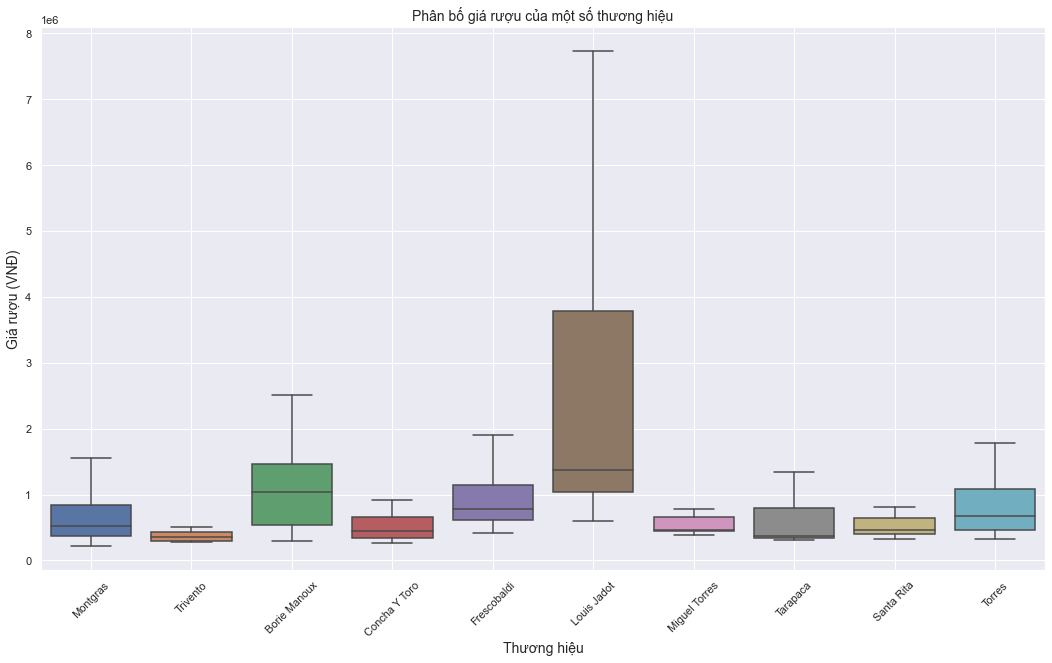

In [75]:
plt.figure(figsize=(18,10))
sns.boxplot(data=brand_vs_price, y='Gia', x = 'Thuong_hieu',showfliers=False)
plt.xticks(rotation=45)
plt.title('Phân bố giá rượu của một số thương hiệu', fontsize=14)
plt.xlabel('Thương hiệu', fontsize=14)
plt.ylabel('Giá rượu (VNĐ)', fontsize=14)
plt.grid(True)
plt.show()

<h3 style='color:#c177e4'> Bước 4: Đánh giá </h3>

🤔🤔🤔 Từ biểu đồ trên ta thấy:
* Hầu hết các thương hiệu được chọn có giá các sản phẩm phân bố nằm chủ yếu trong khoảng từ 200.000 VNĐ đến 1.000.000 VNĐ. Trong đó các thương hiệu `Trivento`, `Convha Y Toro`, `Miguel Torres`, `Santa Rita` nằm hoàn toàn trong khoảng trên.
* Các thương hiệu `Montgras`, `Frescobaldi`, `Torres` có khoảng từ 20% đến 30% sản phẩm có giá cao hơn các sản phẩm còn lại và nằm trong khoảng giá  1.000.000 - 2.000.000 VNĐ.
* Thương hiệu `Borie Manoux` có trên 50% các sản phẩm có giá từ 1.000.000 - 2.500.000 VNĐ.
* Thương hiệu `Louis Jadot` là thương hiệu có nhiều sản phẩm có giá cao và vượt trội hoàn toàn so với các thương hiệu khác khi giá cao nhất có thể lên đến khoảng 7.800.000 VNĐ

In [65]:
series = df['Thuong_hieu'].value_counts()

In [66]:
count_appear[count_appear == 14].index

Index(['Tinazzi', 'Freixenet', 'Vignobles JeanJean', 'Paul Jaboulet Aine'], dtype='object')

In [67]:
tes_df = count_appear.reset_index()
tes_df.groupby(['index','Thuong_hieu']).size()

index                     Thuong_hieu
 689 – Six Eight Nine     2              1
 Abtao                    7              1
 Ad Hoc                   1              1
 Allan Scott              1              1
 Almaden                  2              1
                                        ..
 Benoit Ente              1              1
 Chateau De Sainte Gemme  1              1
 Guarini                  2              1
 Maison Delor             1              1
 Shingleback Wine         1              1
Length: 1508, dtype: int64

In [68]:
series.index[series >= 25]

Index(['Concha Y Toro', 'Borie Manoux'], dtype='object')

In [69]:
df.shape

(5165, 11)

In [70]:
df['Mau_sac'].value_counts()

đỏ ruby                        1642
vàng rơm                        660
đỏ                              399
đỏ đậm                          331
vàng nhạt                       253
                               ... 
vàng rơm pha vàng sậm             1
trắng trong                       1
vàng rơm nhạt ánh thạch anh       1
tím hồng ngọc                     1
đỏ đậm tối                        1
Name: Mau_sac, Length: 248, dtype: int64

In [71]:
df[df['Gia'] < 10000]

,Ma_sp,Ten_sp,Gia,Xuat_xu,Nong_do,Dung_tich,Giong_nho,Mau_sac,Loai_ruou,Thuong_hieu,Vung_lam_vang


In [72]:
df.shape

(5165, 11)

In [73]:
df[df['Ma_sp'] == 'VNCIE3-400']

,Ma_sp,Ten_sp,Gia,Xuat_xu,Nong_do,Dung_tich,Giong_nho,Mau_sac,Loai_ruou,Thuong_hieu,Vung_lam_vang
2637,VNCIE3-400,Rượu Vang La Cacciatora Montepulciano,400000.0,Ý,14.0,750.0,Montepulciano,đỏ ruby,Rượu Vang Đỏ,La Cacciatora,Abruzzo


In [26]:
row_num = clean_df.shape[0]
col_num =  clean_df.shape[1]
print('Số dòng: {}\nSố cột: {}'.format(row_num,col_num))

Số dòng: 3950
Số cột: 11


Số dòng lúc này chỉ còn lại là 3950 dòng so với 5598 dòng ban đầu, dữ liệu bị hao hụt không quá đáng kể.

Lưu dữ liệu đã qua tiền xử lý vào file dữ liệu mới.

In [28]:
clean_df.to_csv(os.path.join(os.getcwd(), 'dataset', 'champagne_info_cleaned.csv'))

### Trực quan một vài biểu đồ để có một cái nhìn tổng quan hơn về dữ liệu

Lấy ra các cột kiểu numeric

In [29]:
numeric_cols = df.select_dtypes('number').columns.tolist()
numeric_cols

['Gia', 'Nong_do', 'Dung_tich']

Biểu đồ boxplot của từng cột có kiểu dữ liệu numeric

C:\Users\PC\AppData\Local\Temp\ipykernel_25024\2615322929.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{}'.format(x) for x in ax.get_xticks()/1e6])


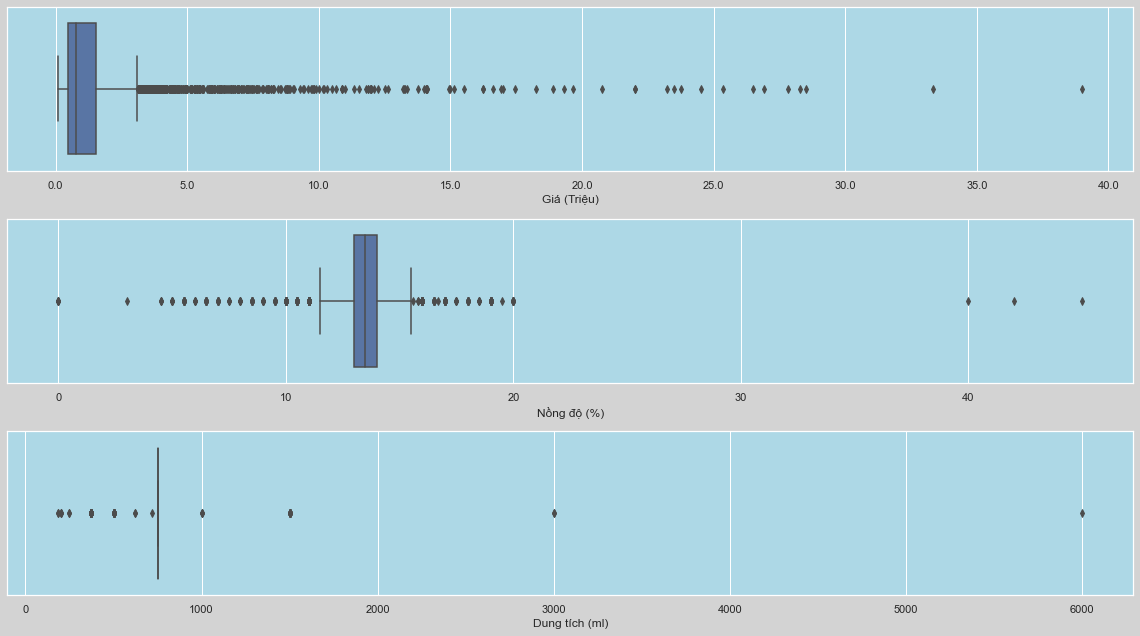

In [30]:
pretty_labels = {
  'Gia' : 'Giá (Triệu)',
  'Nong_do' : 'Nồng độ (%)',
  'Dung_tich' : 'Dung tích (ml)'
}
fig, axes = plt.subplots(3,1, figsize = (16,9))
for i,ax in enumerate(axes.flat):
  sns.boxplot(data = df, x = numeric_cols[i], ax = ax)
  ax.set_xlabel(pretty_labels[numeric_cols[i]])
  if i == 0:
    ax.set_xticklabels(['{}'.format(x) for x in ax.get_xticks()/1e6])

plt.tight_layout()

Nhìn chung, giá trị của các cột dữ liệu kiểu số đều không phân bố rộng mà chỉ tập trung vào một khoảng giá trị nhỏ cũng như xuất hiện nhiều ngoại lệ.

Xem xét thử mối quan hệ giữa giá với nồng độ và dung tích

C:\Users\PC\AppData\Local\Temp\ipykernel_25024\2707811462.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(['{}'.format(x) for x in axes[0].get_xticks()/1e6])
C:\Users\PC\AppData\Local\Temp\ipykernel_25024\2707811462.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(['{}'.format(x) for x in axes[0].get_xticks()/1e6])


Text(0, 0.5, 'Dung tích (ml)')

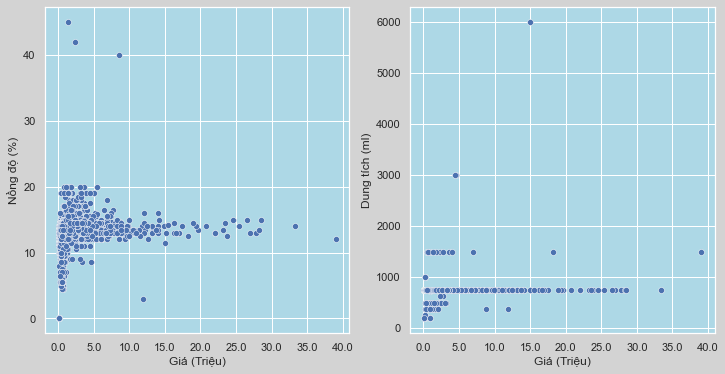

In [31]:
fig, axes = plt.subplots(1,2, figsize = (12,6))
sns.scatterplot(data = df, x = 'Gia', y = 'Nong_do', ax = axes[0])
sns.scatterplot(data = df, x = 'Gia', y = 'Dung_tich', ax = axes[1])
axes[0].set_xlabel(pretty_labels['Gia'])
axes[0].set_xticklabels(['{}'.format(x) for x in axes[0].get_xticks()/1e6])
axes[0].set_ylabel(pretty_labels['Nong_do'])
axes[1].set_xlabel(pretty_labels['Gia'])
axes[1].set_xticklabels(['{}'.format(x) for x in axes[0].get_xticks()/1e6])
axes[1].set_ylabel(pretty_labels['Dung_tich'])

Có vẻ là giá rượu không hề có mối liên hệ gì với nồng độ hay dung tích

Những quốc gia được nhập rượu về nhiều nhất

<AxesSubplot:xlabel='Số lượng sản phẩm', ylabel='Xuất xứ'>

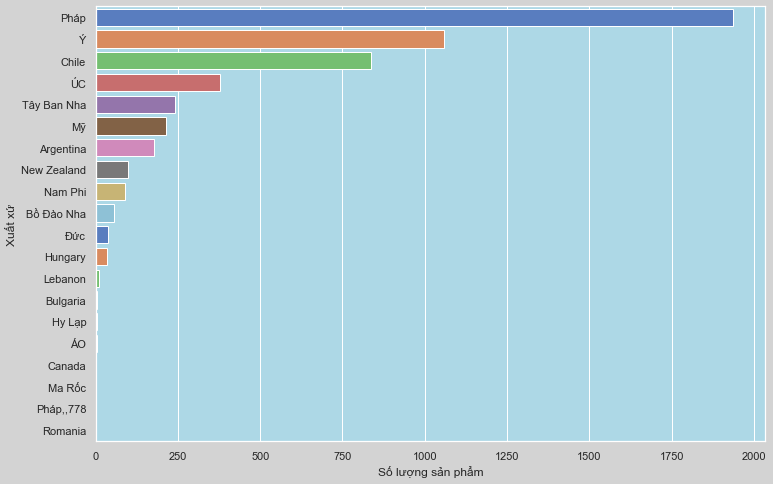

In [32]:
origin_count_df = df['Xuat_xu'].value_counts().to_frame(name = 'Số lượng sản phẩm').reset_index()
origin_count_df = origin_count_df.rename(columns = {'index' : 'Xuất xứ'})
fig, ax = plt.subplots(figsize = (12,8))
sns.barplot(data = origin_count_df, x = 'Số lượng sản phẩm', y = 'Xuất xứ', orient = 'h', palette = 'muted', ax = ax)